# Exploring Uber and Lyft Prices in Boston

Names: Matteo Dall'Olmo, Chase Hurwitz

### Collaborators and Sources

1 "https://pandas.pydata.org/docs/reference/api/pandas.set_option.html"

2 "https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html"

3 "https://pytz.sourceforge.net/"

4 "https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot_table.html"

5 "https://pandas.pydata.org/docs/user_guide/merging.html"

6 "https://www.w3schools.com/python/pandas/ref_df_merge.asp"

7 "https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots"

8 "https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html"

In [21]:
#import statements and nice plots
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import pytz
from scipy.stats import linregress
import seaborn as sns

# Let's run some configurations to make prettier plots
for _ in range(2):
    plt.rcParams['figure.figsize'] = [16, 9]
    plt.rcParams['axes.titlesize'] = 20
    plt.rcParams['axes.labelsize'] = 16
    plt.rcParams['xtick.labelsize'] = 14
    plt.rcParams['ytick.labelsize'] = 14
    plt.rcParams['lines.linewidth'] = 2

## 1. Introduction

For our project, we'll take a look at data for numerous Lyft and Uber rides in Boston and their prices (https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma). Our goal will be to use this dataset to gain some insight about characteristics of rides and _perhaps_ find some patterns in this data.

In general, we will be following the EDA process:
1. Get the data and gain **basic understanding**
2. **Wrangle** the data
3. **Profile** the data
4. Develop questions to investigate (form a **hypotheses**)
5. Use the data to **investigate** hypothesis
6. **Summarize** results and answer questions 
7. **Critically review** our workflow and discuss ethical concerns

## 2. Getting Familiar with the Data

In this section, we will get a feel for our data and tidy it up so that we can analyize it later. 

In [22]:
#load data
rideshares = pd.read_csv("../utility/data/rideshare_kaggle.csv")

In [23]:
#explore columns 
print(rideshares.columns.shape)
print(rideshares.columns)

(57,)
Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTe

In [24]:
#explore shape
rideshares.shape

(693071, 57)

In [25]:
# Configure pandas to display all columns
pd.set_option('display.max_columns', 57)  # Set the maximum number of columns to 57
#explore head
rideshares.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [26]:
##EXPLORING SOME NUMERICAL CATEGORIES WE MAY FIND INTERESTING

In [27]:
#PRICE
# Extract the price column
priceCol = rideshares['price']

# Do not consider examples where the value = NA
id_NA = rideshares['price'].notnull()
priceCol = priceCol[id_NA]

mean = np.mean(priceCol)
standard_dev = np.std(priceCol)
max_width = np.max(priceCol)
min_width = np.min(priceCol)

print(f'mean: {mean}')
print(f'standard deviation: {standard_dev}')
print(f'min: {min_width}')
print(f'max: {max_width}')

mean: 16.545125490614065
standard deviation: 9.324351273650608
min: 2.5
max: 97.5


In [28]:
#HOUR
# Extract the hour column
hourCol = rideshares['hour']

# Do not consider examples where the value = NA
id_NA = rideshares['hour'].notnull()
hourCol = hourCol[id_NA]

mean = np.mean(hourCol)
standard_dev = np.std(hourCol)
max_width = np.max(hourCol)
min_width = np.min(hourCol)

print(f'mean: {mean}')
print(f'standard deviation: {standard_dev}')
print(f'min: {min_width}')
print(f'max: {max_width}')

mean: 11.61913714467926
standard deviation: 6.948109143547298
min: 0
max: 23


In [29]:
#DISTANCE
# Extract the distance column
distanceCol = rideshares['distance']

# Do not consider examples where the value = NA
id_NA = rideshares['distance'].notnull()
distanceCol = distanceCol[id_NA]

mean = np.mean(distanceCol)
standard_dev = np.std(distanceCol)
max_width = np.max(distanceCol)
min_width = np.min(distanceCol)

print(f'mean: {mean}')
print(f'standard deviation: {standard_dev}')
print(f'min: {min_width}')
print(f'max: {max_width}')

mean: 2.1894297553930255
standard deviation: 1.1389361651991075
min: 0.02
max: 7.86


In [30]:
#SURGE
# Extract the surge column
surgeCol = rideshares['surge_multiplier']

# Do not consider examples where the value = NA
id_NA = rideshares['surge_multiplier'].notnull()
surgeCol = surgeCol[id_NA]

mean = np.mean(surgeCol)
standard_dev = np.std(surgeCol)
max_width = np.max(surgeCol)
min_width = np.min(surgeCol)

print(f'mean: {mean}')
print(f'standard deviation: {standard_dev}')
print(f'min: {min_width}')
print(f'max: {max_width}')

mean: 1.0138697911180816
standard deviation: 0.09164119598739344
min: 1.0
max: 3.0


Interesting that surge multiplier stays between 1 and 3. That feels about right.

In [31]:
##INTERESTED IN SEEING HOW RAIN AFFECTS PRICE
rideRain = rideshares[rideshares['precipProbability'] == 1]
priceCol = rideRain['price']

mean = np.mean(priceCol)
standard_dev = np.std(priceCol)
max_width = np.max(priceCol)
min_width = np.min(priceCol)

print(f'mean: {mean}')
print(f'standard deviation: {standard_dev}')
print(f'min: {min_width}')
print(f'max: {max_width}')

mean: 16.550302456033958
standard deviation: 9.333241266185874
min: 2.5
max: 80.5


In [32]:
##EXPLORING SOME CATEGORICAL FEATURES WE MAY FIND INTERESTING

In [33]:
uniqueSourceVals = rideshares['source'].value_counts()
print("Sources:")
print(uniqueSourceVals)

print("\n\n Destination: ")
uniqueDestinationVals = rideshares['destination'].value_counts()
print(uniqueDestinationVals)

print("\n\n short_summary: ")
uniqueSummaryVals = rideshares['short_summary'].value_counts()
print(uniqueSummaryVals)

print("\n\n names: ")
uniqueNameVals = rideshares['name'].value_counts()
print(uniqueNameVals)


Sources:
Financial District         58857
Theatre District           57813
Back Bay                   57792
Boston University          57764
North End                  57763
Fenway                     57757
Northeastern University    57756
South Station              57750
Haymarket Square           57736
West End                   57562
Beacon Hill                57403
North Station              57118
Name: source, dtype: int64


 Destination: 
Financial District         58851
Theatre District           57798
Back Bay                   57780
Haymarket Square           57764
Boston University          57764
Fenway                     57757
North End                  57756
Northeastern University    57755
South Station              57749
West End                   57575
Beacon Hill                57403
North Station              57119
Name: destination, dtype: int64


 short_summary: 
 Overcast             218895
 Mostly Cloudy        146210
 Partly Cloudy        127224
 Clear           

In [34]:
lyftNum = rideshares[rideshares['cab_type']=='Lyft']
print(lyftNum.shape)
uberNum = rideshares[rideshares['cab_type']=='Uber']
print(uberNum.shape)

(307408, 57)
(385663, 57)


<!-- BEGIN QUESTION -->

### Section 1

Let's start by taking a look at our data.

This dataset collects data from Uber and Lyft rides in the Boston area. This dataset has 693071 data points and 57 features, making it one of the larger datasets we have worked with. The features are both categorical and numerical. Some numerical features include distance, surge multiplier, price, hour, and temperature. Some cateogrical features include short weather summary, cab type, company (uber or lift), source, and destination.

We have performed numerous explorations on both numerical and categorical features to better understand our dataset. We observed differerent means, STDs, mins and maxes of numerical features, and looked at the distribution of categorical features. One thing we found interesting was how the sources and destinations seem to all be evenly split around 57,000 instances per source and destination. Further, the name of the car cabs seems to have been sampled roughly evenely at 51,000-55,0000 instances per unique value. This reveals that some type of process has been carried out by whoever collected this data to ensure some uniformity across these features. Thus, this liklely is not raw data and it seems to be fairly well formatted. It seems that in total, there are about 80,000 more uber rides than lyft rides in the dataset.

This data was collected between  11-26-2018 to 12-18-2018. It is not totally clear how this data was collected, as the data card on Kaggle does not describe it. 

### Section 2

Let's do some data wrangling. 

In [35]:
rideshares_clean = rideshares.dropna().copy() #drop any data points that have missing values

In [36]:
#convert our epoch/unix times to datetimes and then convert from GMT to EST

est = pytz.timezone('US/Eastern')

rideshares_clean.loc[:, 'sunriseTime'] = pd.to_datetime(rideshares_clean['sunriseTime'], unit='s')
rideshares_clean.loc[:, 'sunriseTime'] = rideshares_clean['sunriseTime'].dt.tz_localize('UTC').dt.tz_convert(est)

rideshares_clean.loc[:, 'sunsetTime'] = pd.to_datetime(rideshares_clean['sunsetTime'], unit='s')
rideshares_clean.loc[:, 'sunsetTime'] = rideshares_clean['sunsetTime'].dt.tz_localize('UTC').dt.tz_convert(est)

rideshares_clean.loc[:, 'timestamp'] = pd.to_datetime(rideshares_clean['timestamp'], unit='s')
rideshares_clean.loc[:, 'timestamp'] = rideshares_clean['timestamp'].dt.tz_localize('UTC').dt.tz_convert(est)


rideshares_clean.head()


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,2018-12-16 04:30:07.890000128-05:00,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,2018-12-16 07:08:04-05:00,2018-12-16 16:14:24-05:00,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2018-11-26 21:00:23.676999936-05:00,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,2018-11-26 06:49:29-05:00,2018-11-26 16:16:32-05:00,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,2018-11-27 20:00:22.197999872-05:00,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,2018-11-27 06:50:37-05:00,2018-11-27 16:16:04-05:00,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,2018-11-29 23:53:02.749000192-05:00,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,2018-11-29 06:52:50-05:00,2018-11-29 16:15:14-05:00,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,2018-11-28 22:49:20.223000064-05:00,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,2018-11-28 06:51:44-05:00,2018-11-28 16:15:38-05:00,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [37]:
columns_to_drop = ['day', 'month', 'id', 'timezone', 'long_summary', 'latitude', 'longitude', 
                   'long_summary', 'humidity', 'windGustTime', 'visibility', 'temperatureHigh', 
                   'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 
                   'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
                   'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone',
                   'moonPhase', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax',
                   'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime',
                   'apparentTemperatureMax', 'apparentTemperatureMaxTime']
rideshares_clean = rideshares_clean.drop(columns=columns_to_drop, axis=1)
rideshares_clean.head()

,timestamp,hour,datetime,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,temperature,apparentTemperature,short_summary,precipIntensity,precipProbability,windSpeed,windGust,sunriseTime,sunsetTime,precipIntensityMax
0,2018-12-16 04:30:07.890000128-05:00,9,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.34,37.12,Mostly Cloudy,0.0000,0.0,8.66,9.17,2018-12-16 07:08:04-05:00,2018-12-16 16:14:24-05:00,0.1276
1,2018-11-26 21:00:23.676999936-05:00,2,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,43.58,37.35,Rain,0.1299,1.0,11.98,11.98,2018-11-26 06:49:29-05:00,2018-11-26 16:16:32-05:00,0.1300
2,2018-11-27 20:00:22.197999872-05:00,1,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,38.33,32.93,Clear,0.0000,0.0,7.33,7.33,2018-11-27 06:50:37-05:00,2018-11-27 16:16:04-05:00,0.1064
3,2018-11-29 23:53:02.749000192-05:00,4,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,34.38,29.63,Clear,0.0000,0.0,5.28,5.28,2018-11-29 06:52:50-05:00,2018-11-29 16:15:14-05:00,0.0000
4,2018-11-28 22:49:20.223000064-05:00,3,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,37.44,30.88,Partly Cloudy,0.0000,0.0,9.14,9.14,2018-11-28 06:51:44-05:00,2018-11-28 16:15:38-05:00,0.0001


## Reasons for Dropping Columns

- day and month included in datetime, kept hour because it is already clean and easy to use
- id is irrelavent
- timezone is the same for every ride
- latitude and longitude are not good features because the values are all the same if the source/destination are the same, no difference to using source and destination
- long_summary was too difficult to parse and short_summary was much more usable
- We didn't think humidity, visibility, dewPoint, pressure, windBearing, windGustTime, cloudCover, uvIndex, uvIndexTime, visibility.1, ozone, or moonPhase would have a very strong correlation to surge_multiplier and wanted to focus on other variables
- The rest of the dropped features had to do with weather. We decided to just focus on the apparantWeather feature as it seemed to be the most important to an individual calling a Lyft ride at any given moment, and we thought it would have the greatest correlation with surge_multiplier. The rest of the data was confusing to work with and/or irrelevant. Why would the minimum temperature of the day be relavent if the ride is called at high noon?

In [38]:
#Create a new column representing the day of the week - Monday=0, Tuesday=1, etc.
rideshares_clean['day_of_week'] = rideshares_clean['timestamp'].dt.dayofweek

In [39]:
#create a new dataframe of just lyft rides and uber rides
lyfts = rideshares_clean[rideshares_clean['cab_type']=='Lyft']
ubers = rideshares_clean[rideshares_clean['cab_type'] == 'Uber']

### Section 3

Now that we cleaned up our data, we are ready to look into it. In this section, we want to profile our data and explore its variables.

In [40]:
rideshares_clean.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
hour,637976.0,11.618528,6.948776,0.00,6.00,12.0000,18.0000,23.0000
price,637976.0,16.545125,9.324359,2.50,9.00,13.5000,22.5000,97.5000
distance,637976.0,2.189261,1.135413,0.02,1.27,2.1600,2.9300,7.8600
surge_multiplier,637976.0,1.015068,0.095422,1.00,1.00,1.0000,1.0000,3.0000
temperature,637976.0,39.582406,6.725500,18.91,36.45,40.4900,43.5800,57.2200
apparentTemperature,637976.0,35.878440,7.917260,12.13,31.91,35.9000,40.0100,57.2200
precipIntensity,637976.0,0.008909,0.026880,0.00,0.00,0.0000,0.0000,0.1447
precipProbability,637976.0,0.145941,0.328776,0.00,0.00,0.0000,0.0000,1.0000
windSpeed,637976.0,6.186795,3.147856,0.45,3.41,5.9100,8.4100,15.0000
windGust,637976.0,8.470616,5.288683,0.80,4.06,7.5500,11.7400,27.2500


In [41]:
rideshares_clean.select_dtypes(include='object').describe().transpose()

,count,unique,top,freq
datetime,637976,31350,2018-11-26 23:33:14,151
source,637976,12,Financial District,54197
destination,637976,12,Financial District,54192
cab_type,637976,2,Uber,330568
product_id,637976,12,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,55096
name,637976,12,UberXL,55096
short_summary,637976,9,Overcast,201429


In [42]:
ubers.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
hour,330568.0,11.608864,6.942370,0.00,6.00,12.0000,18.0000,23.0000
price,330568.0,15.795343,8.560300,4.50,9.00,12.5000,21.5000,89.5000
distance,330568.0,2.191386,1.178973,0.02,1.30,2.1700,2.8400,7.8600
surge_multiplier,330568.0,1.000000,0.000000,1.00,1.00,1.0000,1.0000,1.0000
temperature,330568.0,39.569407,6.720901,18.91,36.45,40.4900,43.5800,57.2200
apparentTemperature,330568.0,35.853984,7.916077,12.13,31.91,35.9000,40.0100,57.2200
precipIntensity,330568.0,0.008951,0.026943,0.00,0.00,0.0000,0.0000,0.1447
precipProbability,330568.0,0.146757,0.329380,0.00,0.00,0.0000,0.0000,1.0000
windSpeed,330568.0,6.197198,3.150455,0.45,3.41,5.9100,8.4100,15.0000
windGust,330568.0,8.485149,5.294726,0.80,4.06,7.5500,11.7400,27.2500


### Interesting!! It seems like the Uber surge_mulitplier is always 1. Let's confirm this observation:

In [43]:
uber_surge = ubers[ubers['surge_multiplier'] > 1]
uber_surge.shape

(0, 22)

### Confirmed! Every single uber ride has a surge_mulitplier of 1. 
We believe either the person who put together this dataset removed any values that are not 1, or perhaps the uber surge_multiplier is based on entirely different features than Lyft's algorithm. We know that Lyft must have values greater than 1 for its surge_multiplier because rideshares_clean has a mean greater than 1 for surge multiplier. Thus, let's explore lifts surge_multipliers that are greater than 1.

In [44]:
lyft_surge = lyfts[lyfts['surge_multiplier'] > 1]
lyft_surge.shape

(20975, 22)

### Let's visualize the different Lyft surge_multipliers:

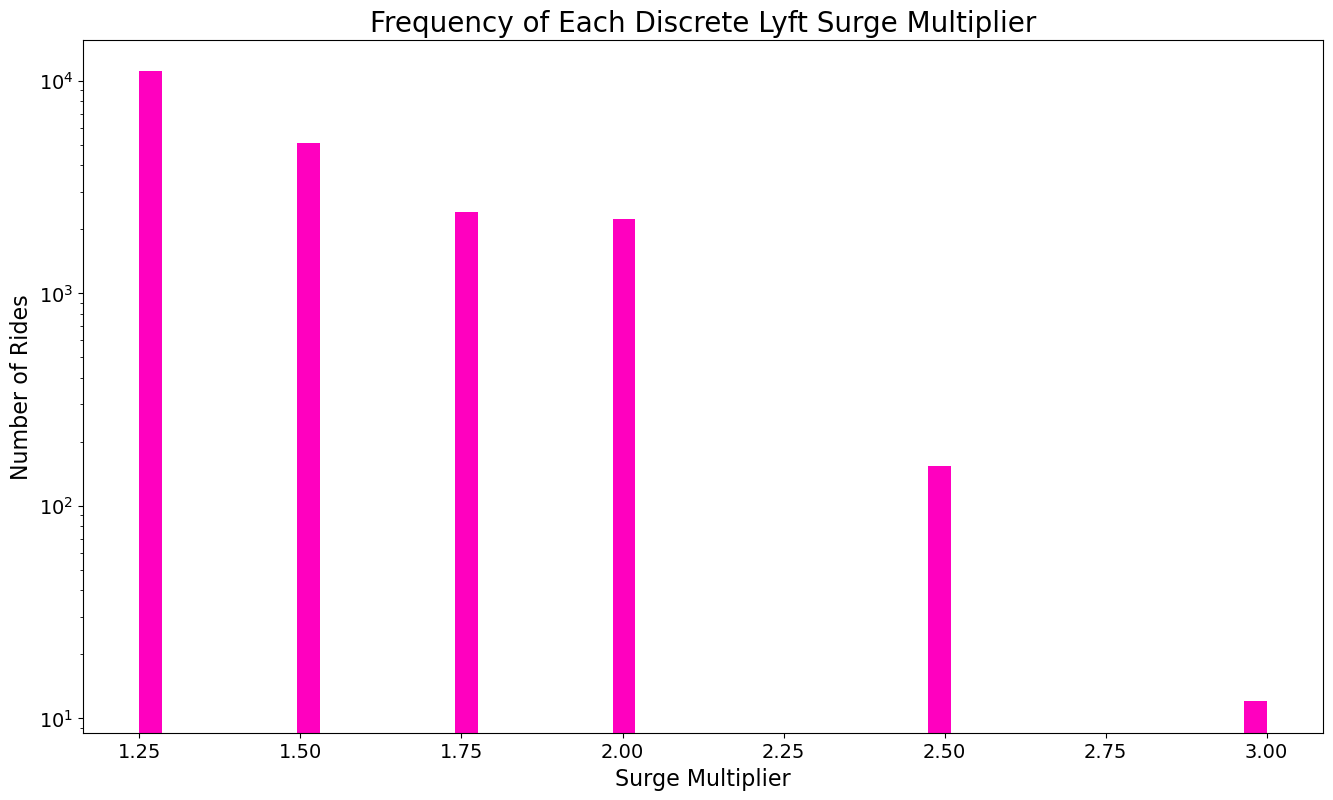

In [45]:
plt.hist(lyft_surge['surge_multiplier'], bins=50, log=True, color="#FF00BF")
plt.title("Frequency of Each Discrete Lyft Surge Multiplier")
plt.ylabel("Number of Rides")
plt.xlabel("Surge Multiplier")
plt.show();

### The Graph (in lovely Lyft pink) above reveals important numbers about the different frequencies of Lyft's surge_multiplier values:
The frequencies are as follows:

1.25 = 11085

1.50 = 5065

1.75 = 2420

2.00 = 2239

2.50 = 154

3.00 = 12

Lyft somewhat frequently surges their prices, but rarely does the surge multiplier rise to or above 2.5 in this dataset.
Out of ~300,000 Lyft rides, only around 21,000 are surge multiplied and only 166 rides ever went at or above 2.5x.

### Let's look at the relationship between price and the surge multiplier
<a id='Price'></a>

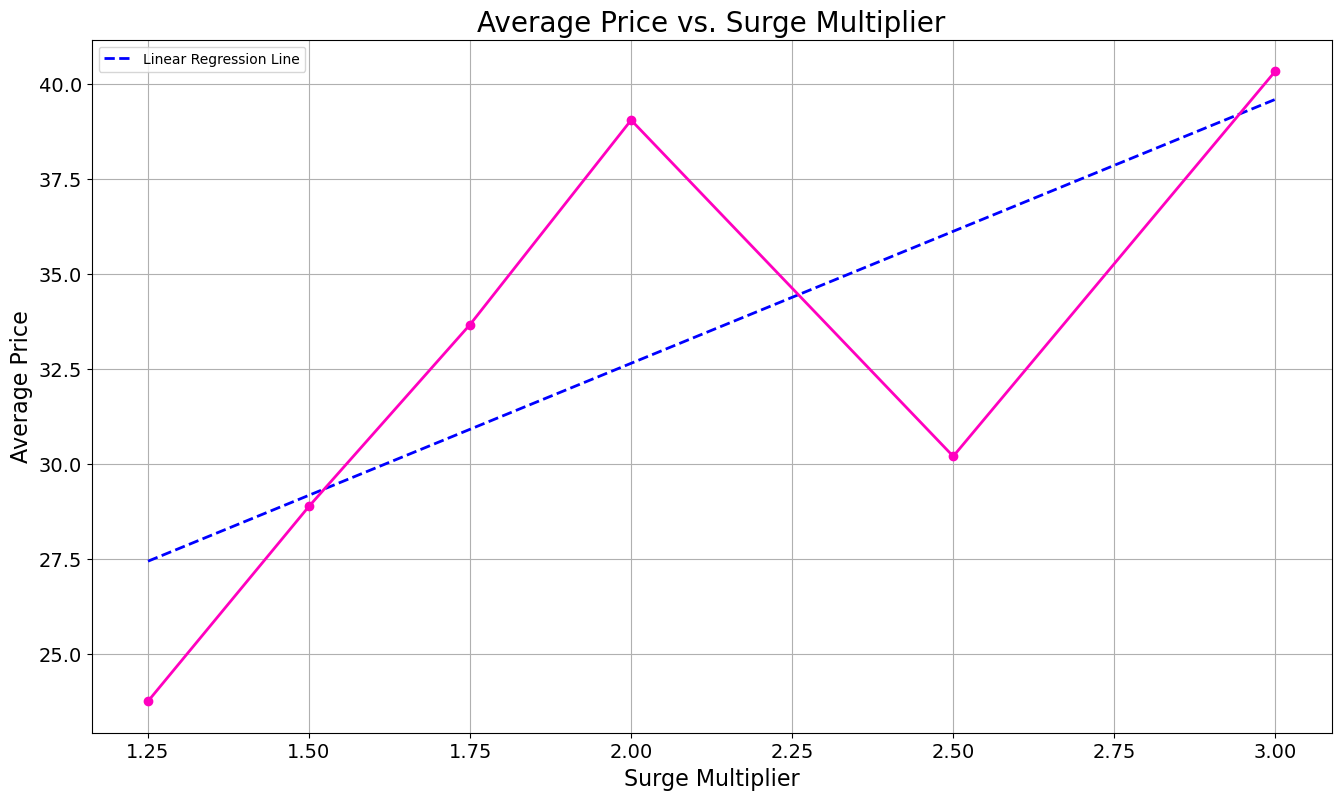

In [46]:
# Group the data by 'surge_multiplier' and calculate the mean price for each group
average_prices = lyft_surge.groupby('surge_multiplier')['price'].mean()


# Extract the surge multipliers and average prices
surge_multipliers = average_prices.index
average_prices = average_prices.values

#get our linear regression model
slope, intercept, r_value, p_value, std_err = linregress(surge_multipliers, average_prices)
linear_regression_line = intercept + slope * surge_multipliers

plt.plot(surge_multipliers, linear_regression_line, linestyle='--', color='b', label='Linear Regression Line')

plt.plot(surge_multipliers, average_prices, marker='o', linestyle='-', color='#FF00BF')  #marker, linestyle, color
plt.xlabel('Surge Multiplier')
plt.ylabel('Average Price')
plt.title('Average Price vs. Surge Multiplier')
plt.grid(True)
plt.legend()
plt.show()

The graph above reveals a clear direct relationship between the surge multiplier and the price; thus, this is clearly an important feature for customers that can help predict how expensive their ride will be. We created a line plot of the average price per surge multiplier and then created a linear regression model to represent that relationship nicely. We are a bit confused by the fact that the average price at the 2.50 multiplier deviates from the overall trend, and it could be due to a bunch of different reasons, such as different distances or cab types. Nonetheless, we are confident in the relationship we have modeled. Evidently, customers should care about the surge multiplier and is a feature worth looking into.


#### [Back to Conclusion](#Conclusion)

## Now let's look at how the time of day might affect surge_multiplier
<a id='aTOD'></a>

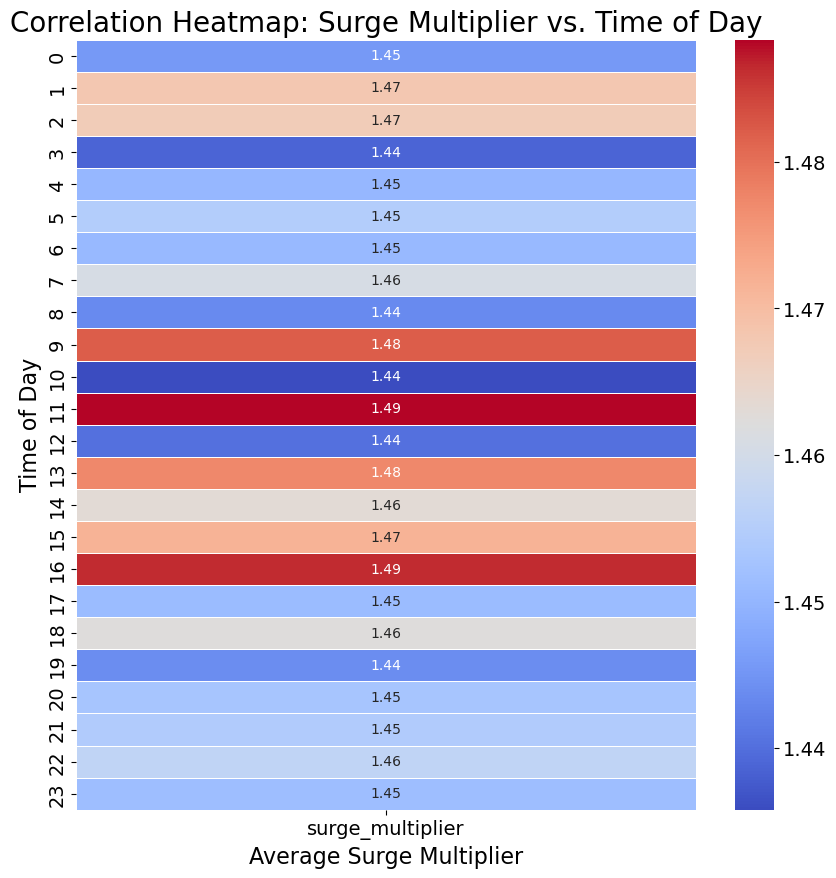

In [48]:
# Pivot the data to get the average surge_multiplier for each day of the week
pivot_table = lyft_surge.pivot_table(index='hour', values='surge_multiplier', aggfunc='mean')

#Create the heatmap
plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap: Surge Multiplier vs. Time of Day')
plt.ylabel('Time of Day')
plt.xlabel('Average Surge Multiplier')
plt.show()

This heatmap demonstrates the relationship between average surge multiplier and the hour of the day. We see the highest surges happened between 9am to 4pm which makes some sense to us. These are some typical workday and schoolday hours, and is probably the times when the city is most active. We also saw some higher surges at 1 and 2 am. Since Boston is a big college town and this dataset has a few universities as sources/destinations, it is possible these surges are happening when college students (or other Bostonians) are coming home from a fun night out in the town. This makes us want to explore more correlations with the surge multiplier!

#### [Back to Conclusion](#Conclusion)

# 3. Hypothesizing

# Our Interests: 
surge_multiplier caught our interest from the very beginning when we were first exploring our data. We found it interesting that there existed a min of 1 and a max of 3. When we kept exploring our data in problem 3, we learned that every single uber ride in this datast has a surge_multiplier = 1, but lyft rides varied. We are interested in exploring Lyft's surge multiplier, particularly what the environment looked like to get these different values. ie what correlations exist for a 1.5 multiplier vs a 3.0 multiplier? Are those correlations stronger?

# Our Question:
What features correlate to a high surge multiplier? Additionally, how do these features differ as surge multiplier increases? Ex: How does feature X differ during a 1.5 multiplier and a 3.0 multiplier?

We will use the data to isolate features that we will then investigate. We will visualize their relationships and determine whether or not there is any relevant correlation.

# Our Hypothesis:
We hypothesize that a surge_multiplier is primarily a function of demand. So factors like time of day, day of the week, weather, sunset time, and other factors that lead people to more desperately want a Lyft ride will contribute to a rising surge_multiplier. Additionally a higher surge_multiplier might correlate with more severe instances of the aforementioned factors such as heavy rain vs a possible drizzle will result in two different surge_multipliers.

# Exploring Our Hypothesis

### First, let's explore any correlations with surge multiplier and the source/destination:

In [49]:
print(lyft_surge['source'].value_counts())
print(lyft_surge['destination'].value_counts())

Back Bay                   2870
Northeastern University    2660
Fenway                     2630
Boston University          2470
Theatre District           2460
Beacon Hill                2050
South Station              1700
Financial District         1505
West End                    985
North Station               845
Haymarket Square            410
North End                   390
Name: source, dtype: int64
Boston University          1885
North End                  1860
Theatre District           1800
Fenway                     1785
Financial District         1780
Northeastern University    1750
Back Bay                   1735
Haymarket Square           1725
South Station              1710
North Station              1670
Beacon Hill                1640
West End                   1635
Name: destination, dtype: int64


### Interesting - it seems the source varies, but destination remains relatively similar for all locations. Let's visualize this:
<a id='iSource'></a>

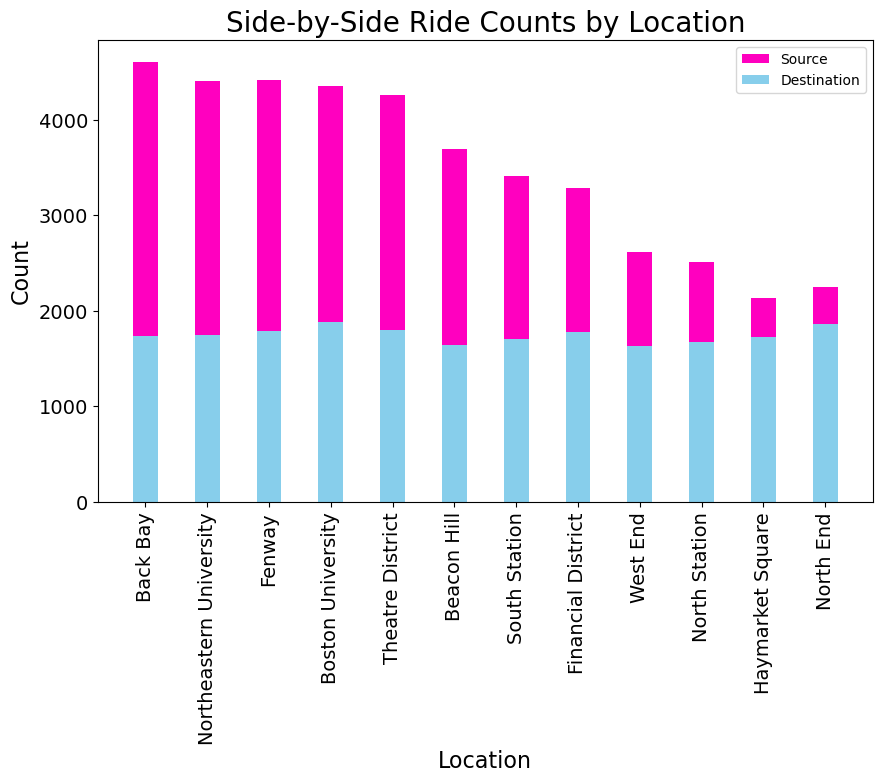

In [50]:
source_counts = lyft_surge['source'].value_counts().reset_index()
source_counts.columns = ['Location', 'Source Count']

destination_counts = lyft_surge['destination'].value_counts().reset_index()
destination_counts.columns = ['Location', 'Destination Count']

# Merge the DataFrames
merged_counts = source_counts.merge(destination_counts, on='Location', how='outer').fillna(0)

# Create a side-by-side bar plot
plt.figure(figsize=(10, 6))
plt.bar(merged_counts['Location'], merged_counts['Source Count'], width=0.4, label='Source', color='#FF00BF', bottom=merged_counts['Destination Count'])
plt.bar(merged_counts['Location'], merged_counts['Destination Count'], width=0.4, label='Destination', color='skyblue')
plt.title('Side-by-Side Ride Counts by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend()
plt.show()

As you can see in the blue portion of the bar plot, the value counts of the various locations as destinations are relatively stable. This dataset is made up entirely of rides that have a surge_multiplier of >1. It seems that the destination of a ride does not correlate to an increase in surge multiplier.

Conversely, the source of a ride is relevant. There seem to be a few locations around Boston that, much more frequently than others, have rides that originate there being surcharged by Lyft. Basically, a ride that has a surge_multiplier greater than one is most likely to come from Back Bay, perhaps because it is a busy comercial district.

#### [Back to Conclusion](#Conclusion)

### Now, let's explore the sources that are being heavily surcharged: We are going to look at each discrete surge charge value and see where the most prevelant sources are per multiplier value:
<a id='Source'></a>

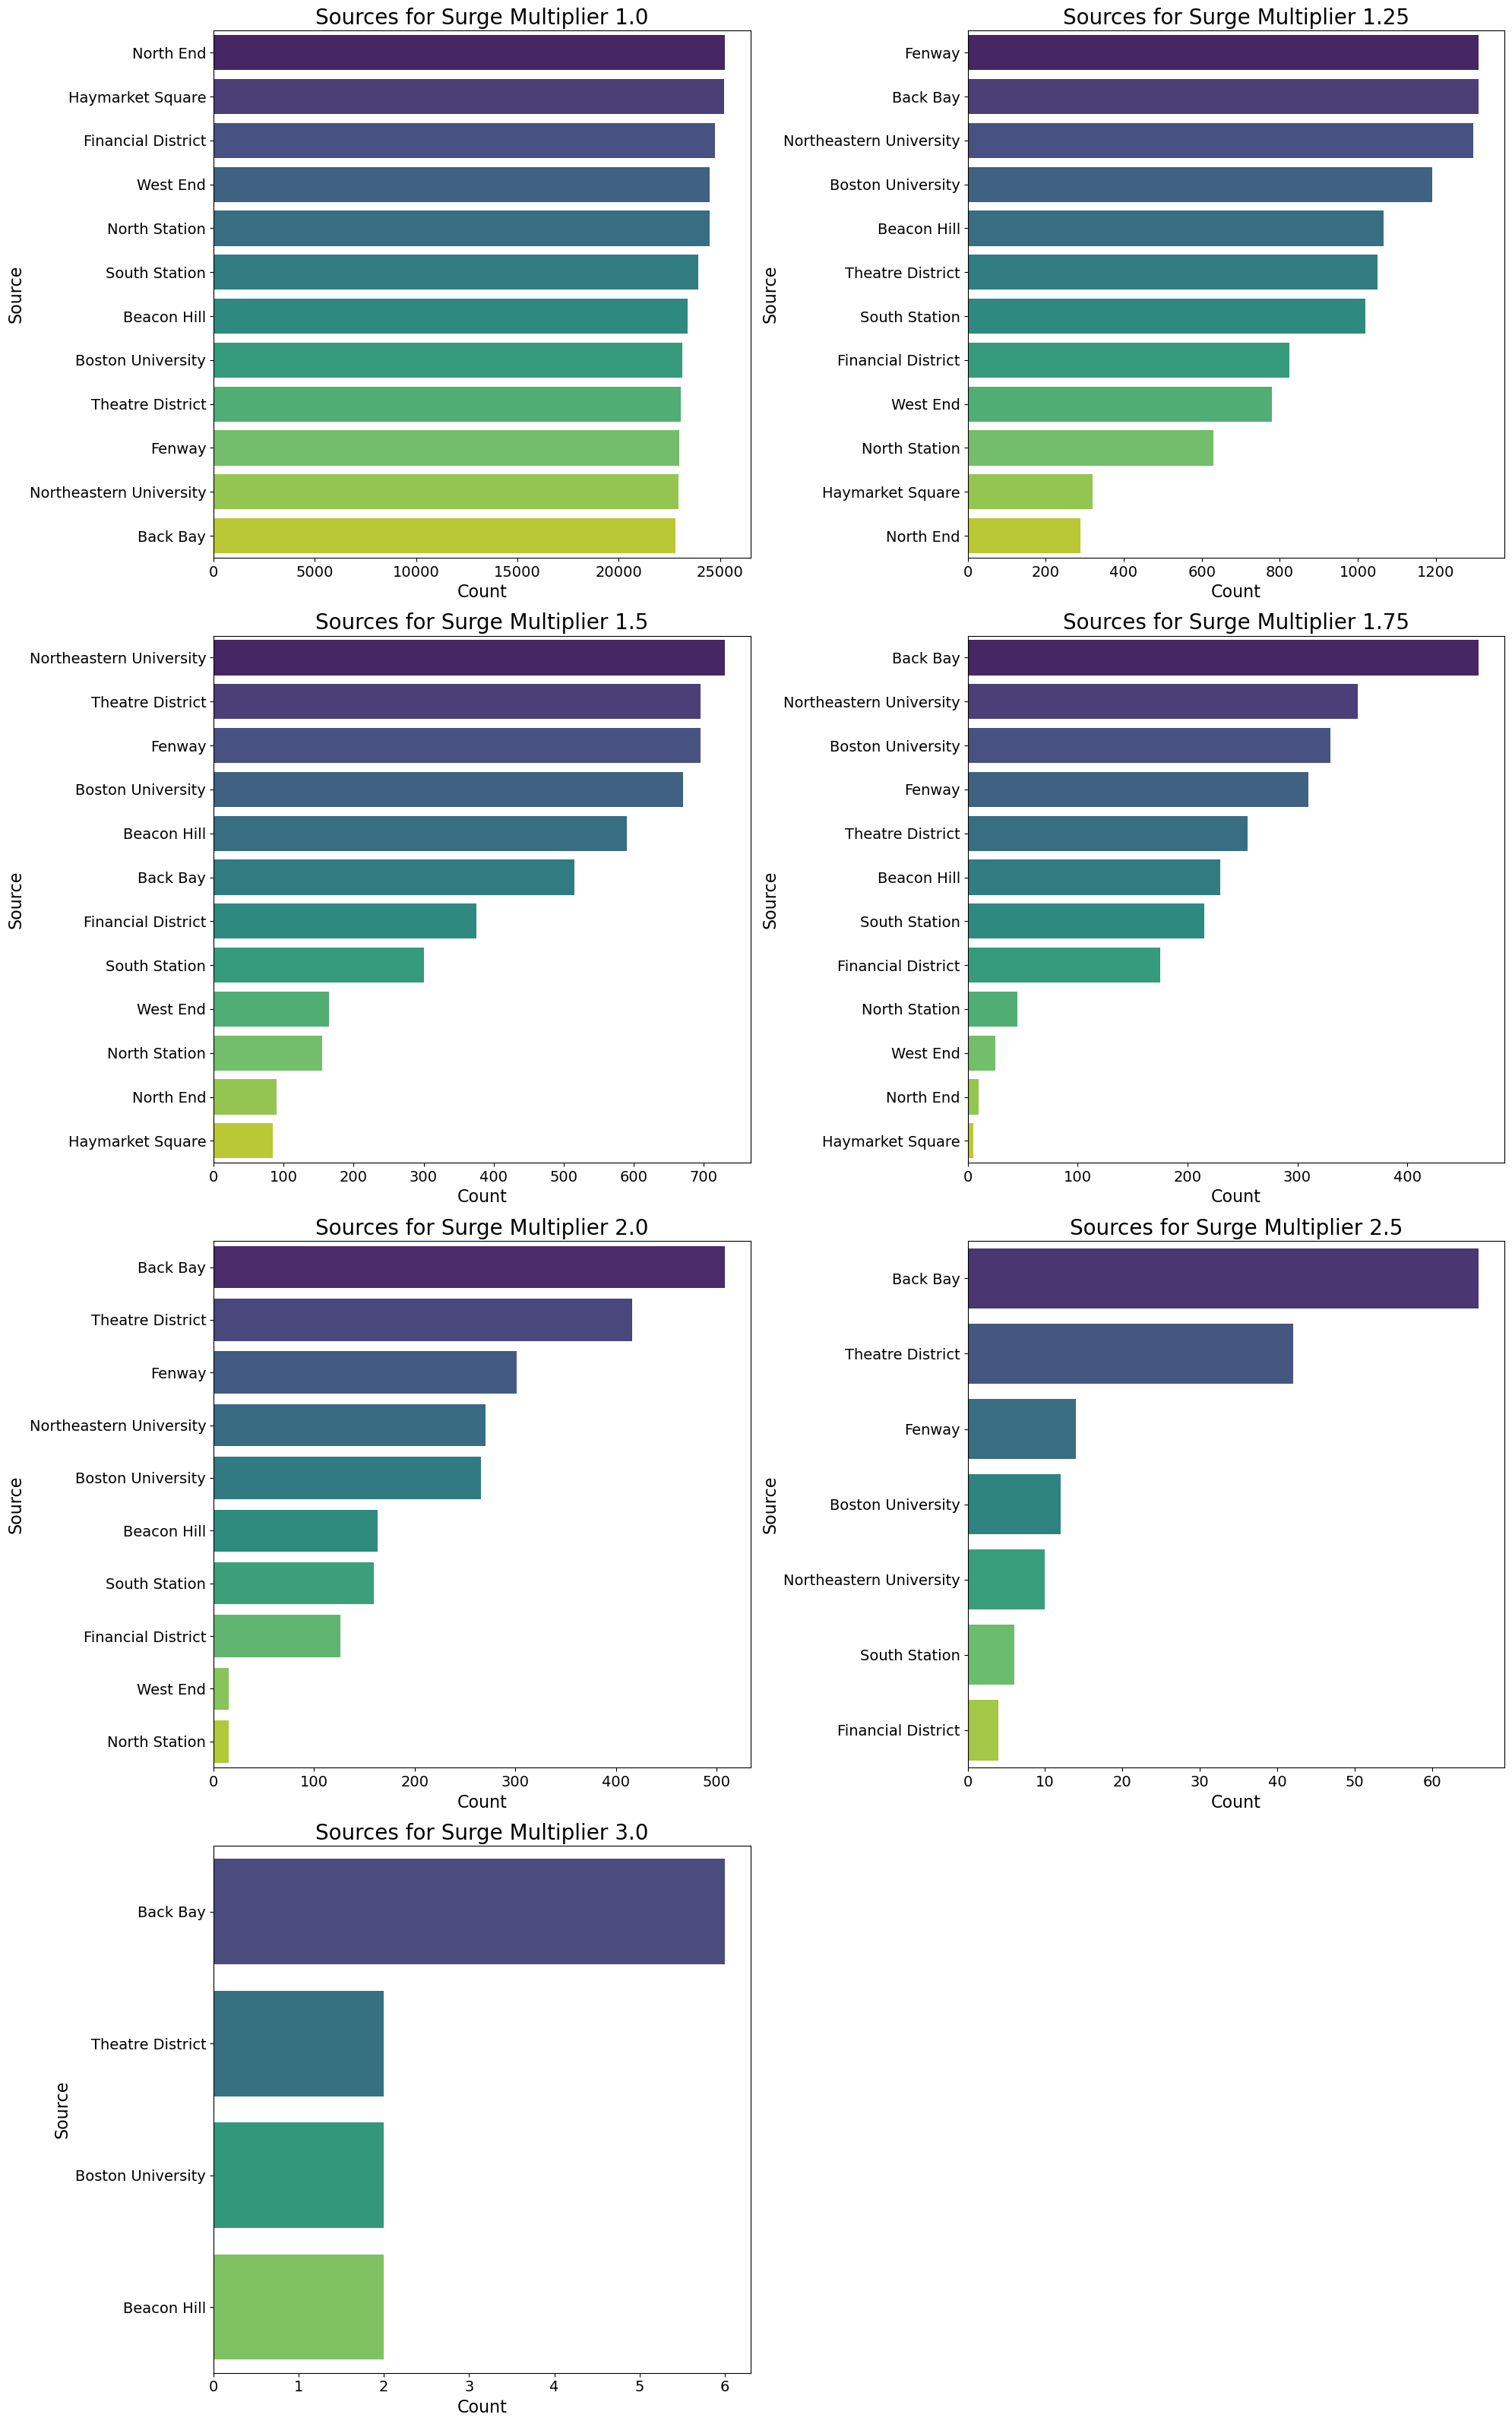

In [51]:
# Get unique surge charge values and sort them in ascending order
unique_surge_values = sorted(lyfts['surge_multiplier'].unique())

sources_count = 12

#number of rows and columns for subplots
num_rows = 4
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 8 * num_rows))

# Create a bar plot for each surge charge value
for i, surge_value in enumerate(unique_surge_values):
    # Filter the data for the current surge charge value
    filtered_data = lyfts[lyfts['surge_multiplier'] == surge_value]
    
    # Count the sources for the filtered data
    source_counts = filtered_data['source'].value_counts()
    
    sources = source_counts.head(sources_count)
    
    # Create a bar plot for the sources in the corresponding subplot
    if(i==0):
        a = axes[0][0]
    if(i==1):
        a = axes[0][1]
    if(i==2):
        a = axes[1][0]
    if(i==3):
        a = axes[1][1]
    if(i==4):
        a = axes[2][0]
    if(i==5):
        a = axes[2][1]
    if(i==6):
        a = axes[3][0]
        
    sns.barplot(x=sources.values, y=sources.index, palette='viridis', ax=a)

    a.set_title(f'Sources for Surge Multiplier {surge_value}')
    a.set_xlabel('Count')
    a.set_ylabel('Source')

    
# Adjust subplot spacing
fig.delaxes(axes[3][1])
plt.tight_layout()

plt.show()

### Conclusion - when a Lyft is called with a surge multiplier equal to one Back Bay is the least likely of sources to be called from. However, when the surge multiplier starts increasing above one, Back Bay is the most likely source for 4/6 discrete multipliers and this is particularly pronounced when the surge multiplier gets higher and higher, starting at 1.75 all the way up to 3.0

#### To us, this indicates Back Bay is likely the location with the most demand for lyft rides. Thus, this demonstrates how source correlates to surge multiplier. Basically, the correlation we observe is that the higher the multiplier gets, the more likely the source is from Black Bay. 

##### According to the following source, Back Bay is a popular commerical district and home to multiple major hotels. Thus, there is likely strong demand for rides in such a district. We demonstrated a clear correlation between source and increasing surge multiplier values.

https://en.wikipedia.org/wiki/Back_Bay,_Boston

#### [Back to Conclusion](#Conclusion)

## Let's continue to explore some other correlations. Perhaps the type of car a customer orders could affect demand and therefore the surge multiplier:
<a id='carType'></a>

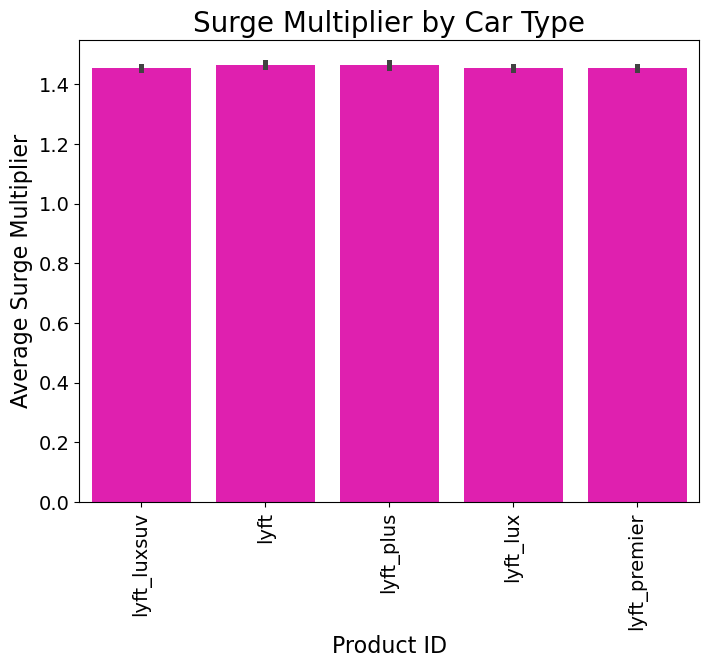

In [52]:
# Surge multiplier vs. product_id
plt.figure(figsize=(8, 6))
sns.barplot(x='product_id', y='surge_multiplier', data=lyft_surge, color='#FF00BF')
plt.title('Surge Multiplier by Car Type')
plt.xlabel('Product ID')
plt.ylabel('Average Surge Multiplier')
plt.xticks(rotation=90)
plt.show()

### Notably, there doesn't seem to be a correlation to Product ID and surge multiplier. The average surge multiplier per car type is roughly 1.42. This is uniform across these types. We still want to include this bar plot to confirm that this feature does not have any correlation to the surge_multiplier.

#### [Back to Conclusion](#Conclusion)

## Let's see if there are any correlations with the surge multiplier as it relates to different weather patterns:
<a id='wind'></a>

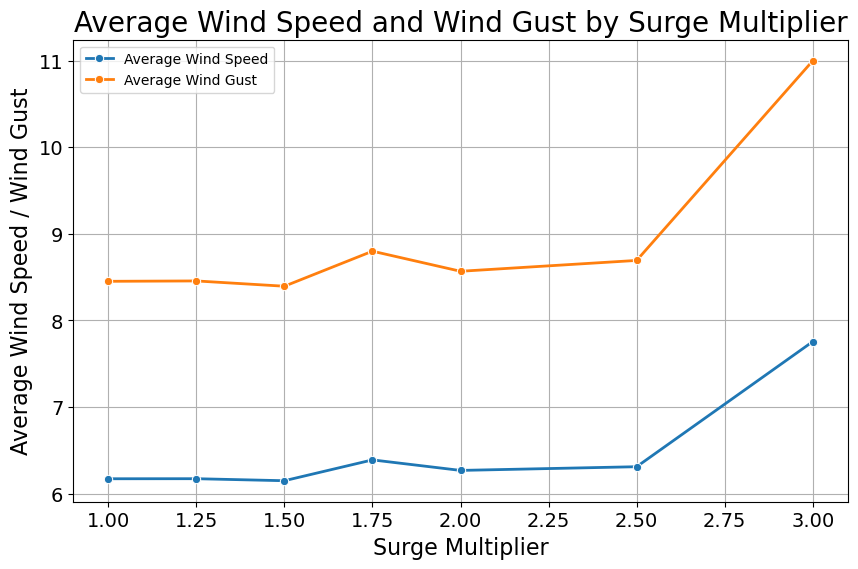

In [53]:
##INVESTIGATING WIND
# Group the data by 'surge_multiplier' and calculate the average windSpeed and windGust for each group
grouped_data = lyfts.groupby('surge_multiplier')[['windSpeed', 'windGust']].mean()

# Reset the index to have 'surge_multiplier' as a column, not an index
grouped_data = grouped_data.reset_index()

# Create a line graph with two lines
plt.figure(figsize=(10, 6))
sns.lineplot(x='surge_multiplier', y='windSpeed', data=grouped_data, label='Average Wind Speed', marker='o')
sns.lineplot(x='surge_multiplier', y='windGust', data=grouped_data, label='Average Wind Gust', marker='o')

plt.title('Average Wind Speed and Wind Gust by Surge Multiplier')
plt.xlabel('Surge Multiplier')
plt.ylabel('Average Wind Speed / Wind Gust')
plt.legend()
plt.grid(True)

plt.show()

#### Interesting - it seems as though there isn't a strong correlation between the multiplier and wind until you reach a higher wind levels. It seems as though more extreme weather correlates to a higher multiplier. It seems as though more extreme weather would cause more demand for a ride somewhere. This would confirm our hypothesis. Let's keep exploring this idea before we confirm for sure:

#### [Back to Conclusion](#Conclusion)

## Let's look at the average apparent temperature (feels like temperature) for each surge_multiplier value. We expect temperature to decrease as the surge_multiplier increases.
<a id='temp'></a>

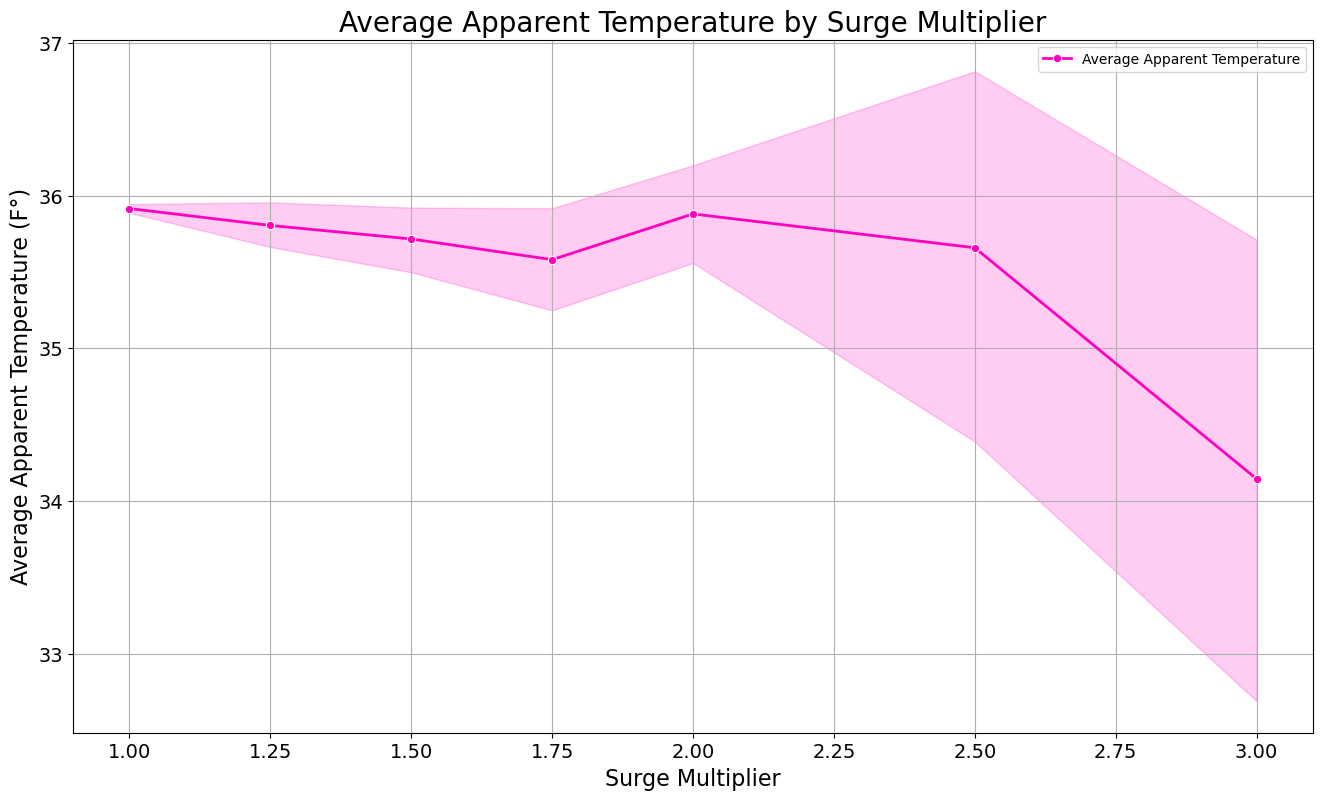

In [54]:
sns.lineplot(x='surge_multiplier', y='apparentTemperature', data=lyfts, label='Average Apparent Temperature', marker='o', color='#FF00BF')
plt.title('Average Apparent Temperature by Surge Multiplier')
plt.xlabel('Surge Multiplier')
plt.ylabel('Average Apparent Temperature (F°)')
plt.legend()
plt.grid(True)

plt.show()

### It seems like this pattern tracks with temperature too. More extreme weather is correlated to a high multiplier.

#### [Back to Conclusion](#Conclusion)

## We have looked at some numerical weather data, but let's look at categorical weather features aswell.
<a id='sws'></a>

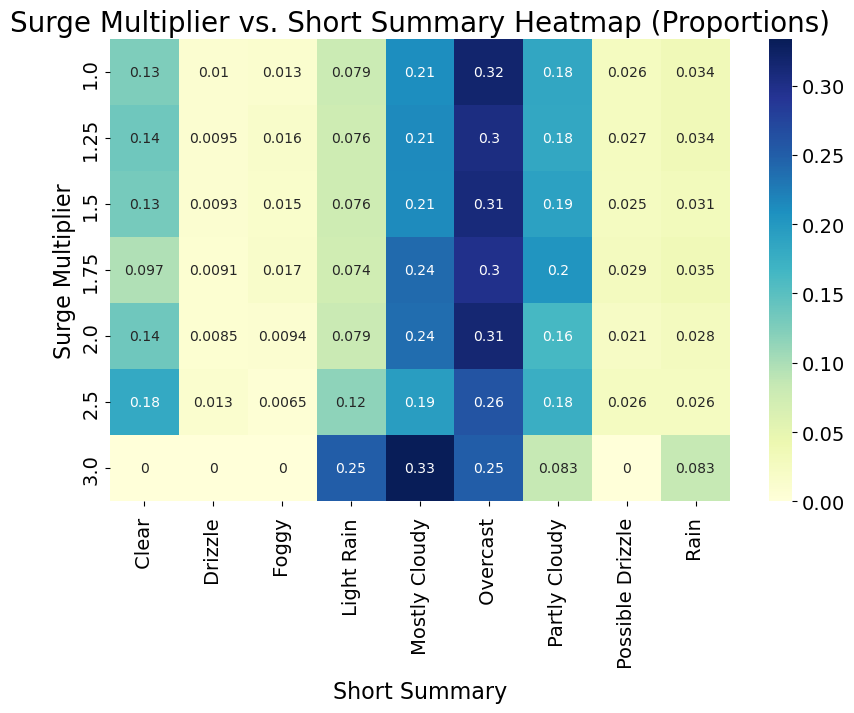

In [55]:
# Create a pivot table with 'surge_multiplier' and 'short_summary'
pivot_table = lyfts.pivot_table(index='surge_multiplier', columns='short_summary', aggfunc='size', fill_value=0)

# Calculate the total rides for each surge multiplier
total_rides = pivot_table.sum(axis=1)

# Divide each cell of the pivot table by the corresponding total rides to get proportions
proportions = pivot_table.div(total_rides, axis=0)

# Create a heatmap with proportions
plt.figure(figsize=(10, 6))
sns.heatmap(proportions, cmap='YlGnBu', annot=True)
plt.title('Surge Multiplier vs. Short Summary Heatmap (Proportions)')
plt.xlabel('Short Summary')
plt.ylabel('Surge Multiplier')

plt.show()

### It seems as though there is some correlation between multiplier and short summary, although it is harder to see. We believe since so many days are recorded as  Overcast, Mostly Cloudy, or Partly Cloudy  (218895, 146210, 127224 instances respectively), these weather reports dominate the proportion of each surge multiplier. It is more insightful to look at the breakdown of each discrete weather report. For example, when we have rain or light rain, examples of relatively severe weather, the most likely surge multiplier is 3.0 which is the least likely in most other scenarios. This seems to support our hypothesis that less desirable weather results in higher demand for Lyfts and thus higher surge multiplier. 

### We were surprised to see that proportionally, mostly cloudy days have a high chance of a 3.0 multiplier. This could be due to a number of other factors as weather is certainly not the only feature that correlates to surge multiplier. Particularly since there are so many instances of mostly cloudy days, there are a lot of other forces that may impact this.

#### [Back to Conclusion](#Conclusion)

## Let's continue to explore rain via the precipProbability, precipIntensity, and precipIntensityMax features
<a id='rain'></a>

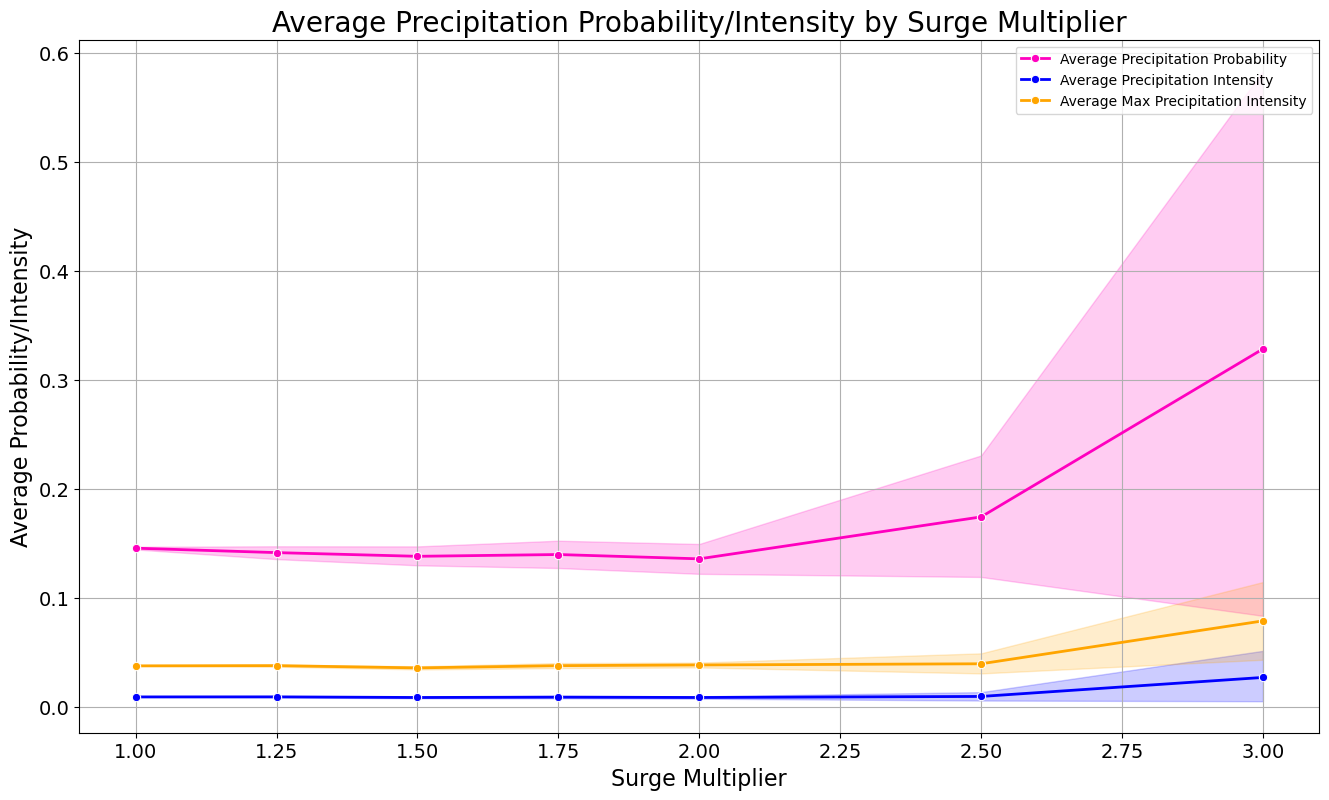

In [56]:
sns.lineplot(x='surge_multiplier', y='precipProbability', data=lyfts, label='Average Precipitation Probability', marker='o', color='#FF00BF')
sns.lineplot(x='surge_multiplier', y='precipIntensity', data=lyfts, label='Average Precipitation Intensity', marker='o', color='blue')
sns.lineplot(x='surge_multiplier', y='precipIntensityMax', data=lyfts, label='Average Max Precipitation Intensity', marker='o', color='orange')
plt.title('Average Precipitation Probability/Intensity by Surge Multiplier')
plt.xlabel('Surge Multiplier')
plt.ylabel('Average Probability/Intensity')
plt.legend()
plt.grid(True)

plt.show()

### Again, this plot seems to confirm our hypothesis and the heatmap above. We observe that at a multiplier of 3.0, we're more likely to get rain and intense rain i.e. more severe weather correlates to a high surge multiplier. Again, this correlation only seems to be relevant at a multiplier of 3.0 (the highest multiplier).

#### [Back to Conclusion](#Conclusion)

## We think proportionally more rides should occur after sunset if they are surge multiplied than if the surge multiplier equals one. More people will try to race home as the weather likely gets colder at night too. Thus, this combines the correlation of worsening weather with the exploration of how the end of the day affects lyft rides.

<a id='sunset'></a>

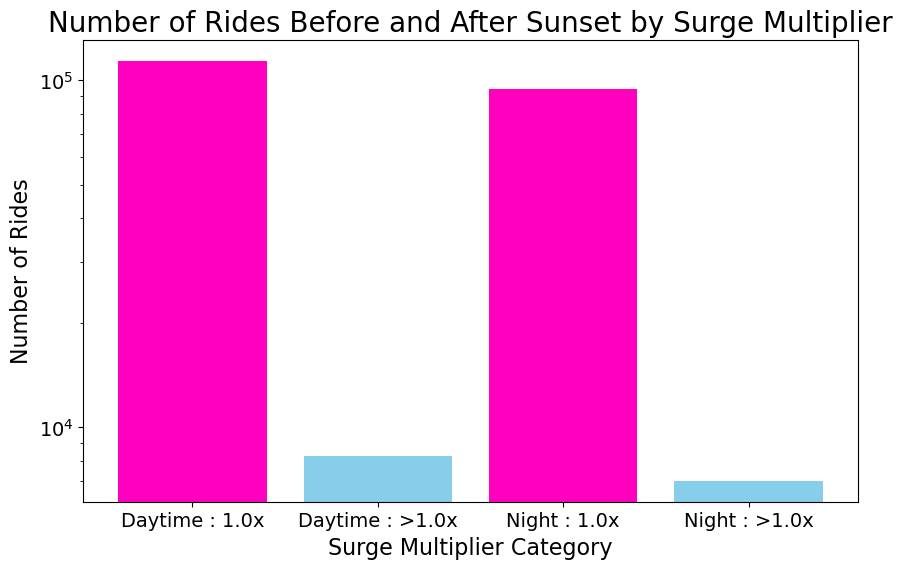

Before sunset, 6.789596400775015% of the rides are surged.
After sunset, 6.941645924696772% of the rides are surged.
We thought that whether the ride occured after sunset or not would have a greater correlation with whether the ride was surcharged, but the ratio of surcharged to non-surcharged rides ended up being basically equal for both day and night.


In [57]:
# Filter data for surge_multiplier == 1
lyfts_surge_1_d = lyfts[(lyfts['surge_multiplier'] == 1) & (lyfts['timestamp'] > lyfts['sunriseTime']) & (lyfts['timestamp'] < lyfts['sunsetTime'])]

# Filter data for surge_multiplier > 1
lyfts_surge_gt_1_d = lyfts[(lyfts['surge_multiplier'] > 1) & (lyfts['timestamp'] > lyfts['sunriseTime']) & (lyfts['timestamp'] < lyfts['sunsetTime'])]

# Filter data for surge_multiplier == 1
lyfts_surge_1_n = lyfts[(lyfts['surge_multiplier'] == 1) & (lyfts['timestamp'] > lyfts['sunsetTime'])]

# Filter data for surge_multiplier > 1
lyfts_surge_gt_1_n = lyfts[(lyfts['surge_multiplier'] > 1) & (lyfts['timestamp'] > lyfts['sunsetTime'])]

# Count the number of rides for each category
count_surge_1_d = len(lyfts_surge_1_d)
count_surge_gt_1_d = len(lyfts_surge_gt_1_d)
count_surge_1_n = len(lyfts_surge_1_n)
count_surge_gt_1_n = len(lyfts_surge_gt_1_n)


# Create a stacked bar graph
plt.figure(figsize=(10, 6))
plt.bar(['Daytime : 1.0x','Daytime : >1.0x', 'Night : 1.0x', 'Night : >1.0x'], [count_surge_1_d, count_surge_gt_1_d, count_surge_1_n, count_surge_gt_1_n], color=['#FF00BF', 'skyblue', '#FF00BF', 'skyblue'], log=True)
plt.title('Number of Rides Before and After Sunset by Surge Multiplier')
plt.xlabel('Surge Multiplier Category')
plt.ylabel('Number of Rides')

plt.show()


print("Before sunset, "+str(100*count_surge_gt_1_d/(count_surge_1_d+count_surge_gt_1_d))+"% of the rides are surged.")
print("After sunset, "+str(100*count_surge_gt_1_n/(count_surge_1_n+count_surge_gt_1_n))+"% of the rides are surged.")
print("We thought that whether the ride occured after sunset or not would have a greater correlation with whether the ride was surcharged, but the ratio of surcharged to non-surcharged rides ended up being basically equal for both day and night.")

#### [Back to Conclusion](#Conclusion)

## Let's check out the day_of_week feature we made. 
<a id='violin'></a>

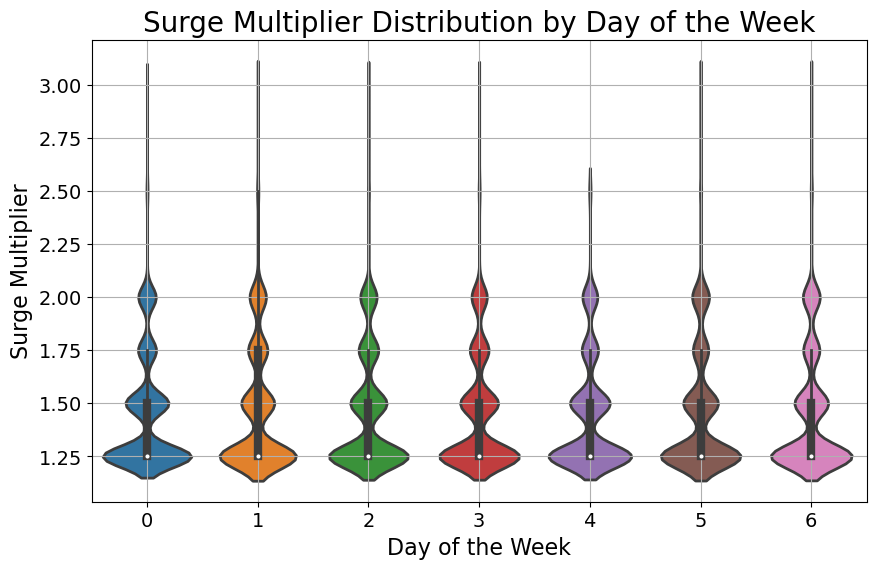

In [58]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='day_of_week', y='surge_multiplier', data=lyft_surge)
plt.title('Surge Multiplier Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Surge Multiplier')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

### All of the violin plots seem to follow a similar structure. We thought that different days would have different distributions of surge_multiplier, but it seems like the day of the week does not correlates to the multiplier. However, we are just averaging the surge_multiplier for the entire day. Looking into the average surge_multiplier hour by hour for each day of the week could reveal some interesting findings.

#### [Back to Conclusion](#Conclusion)

<a id='sTOD'></a>

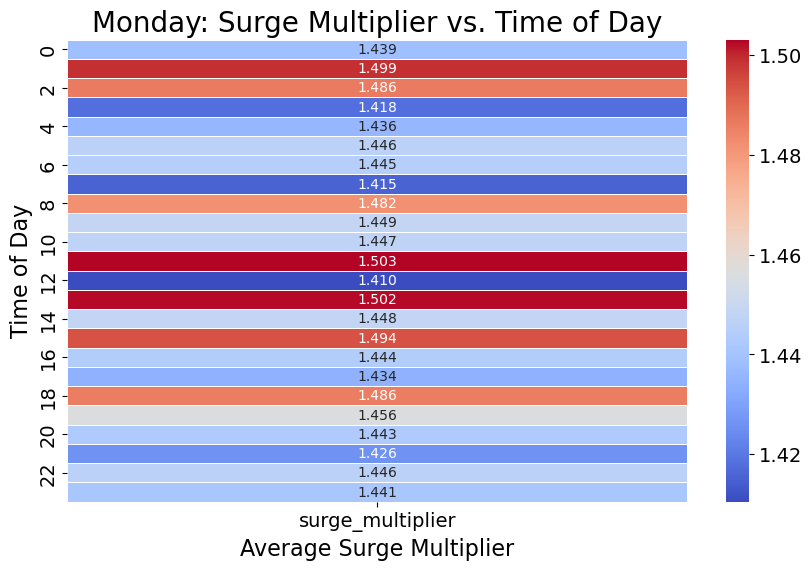

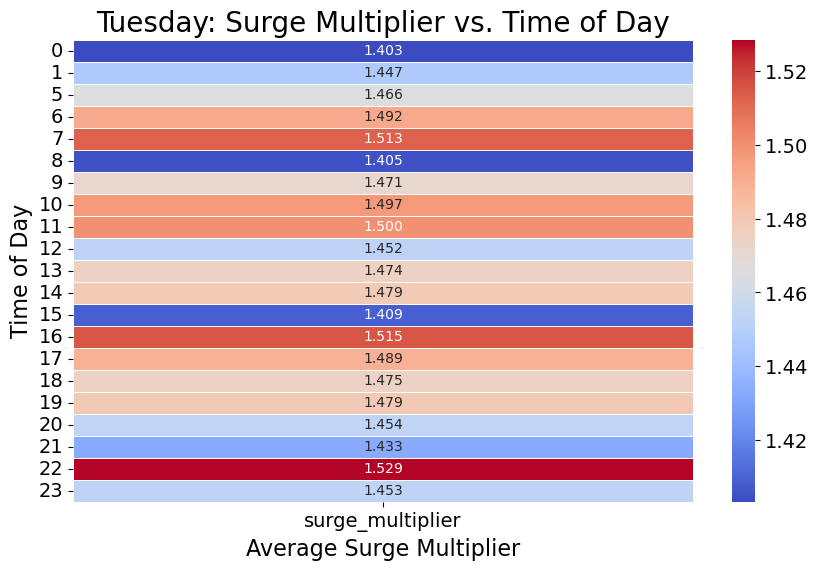

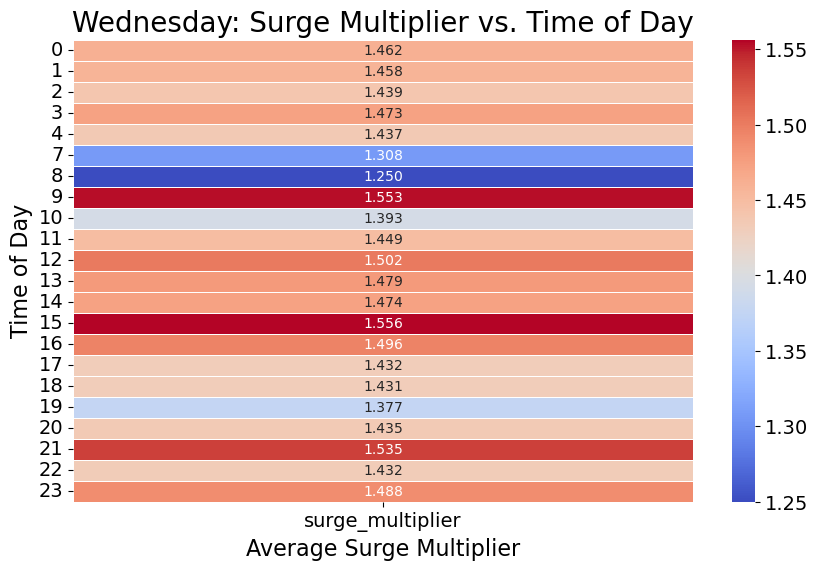

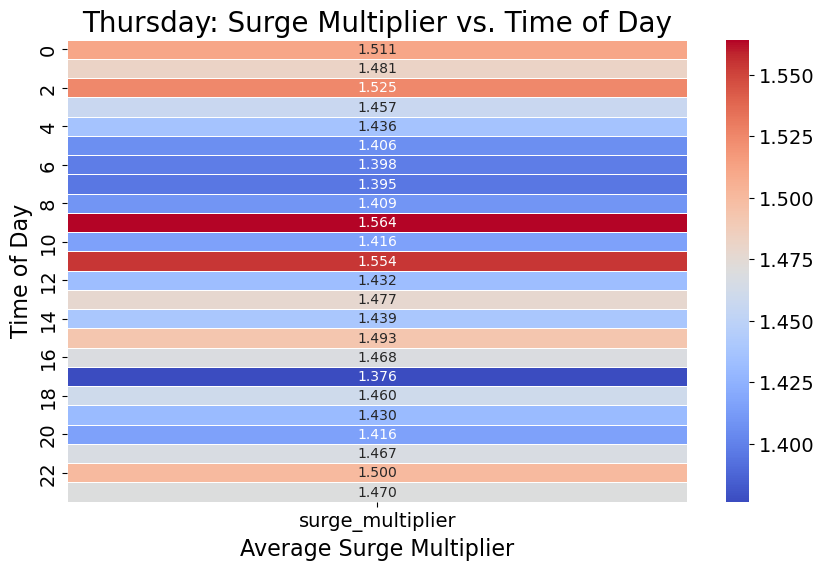

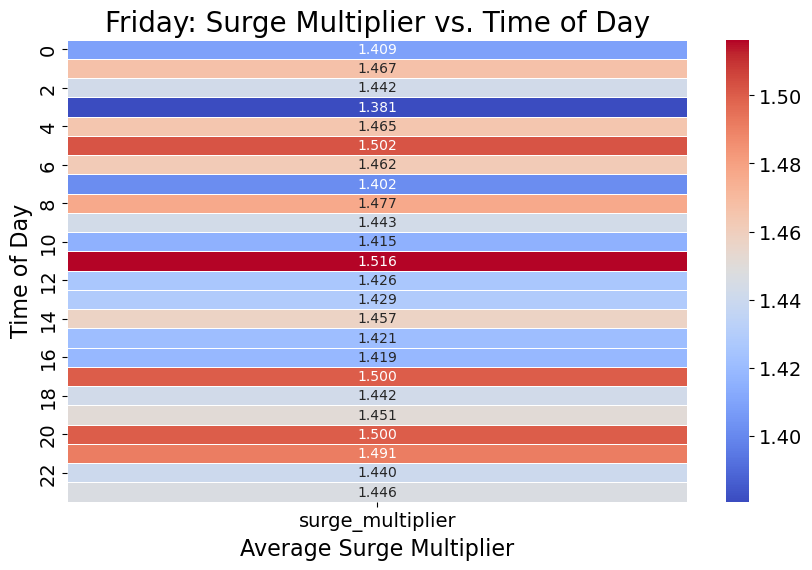

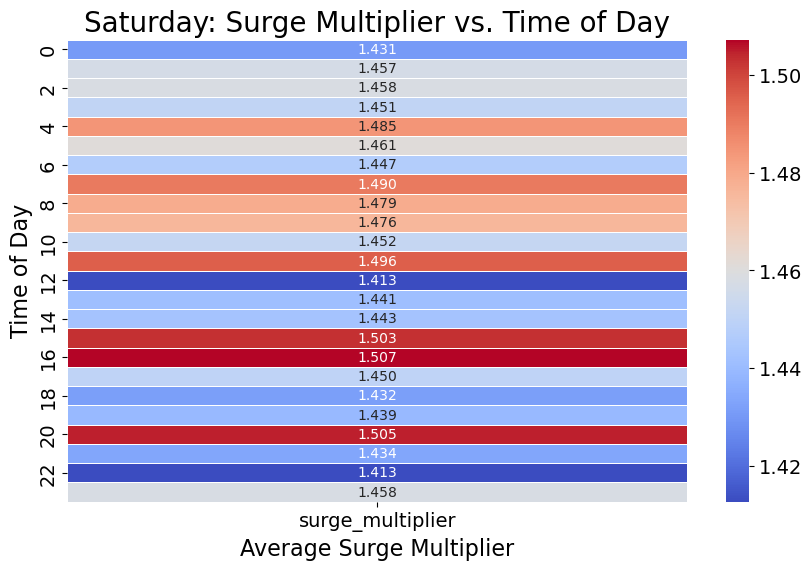

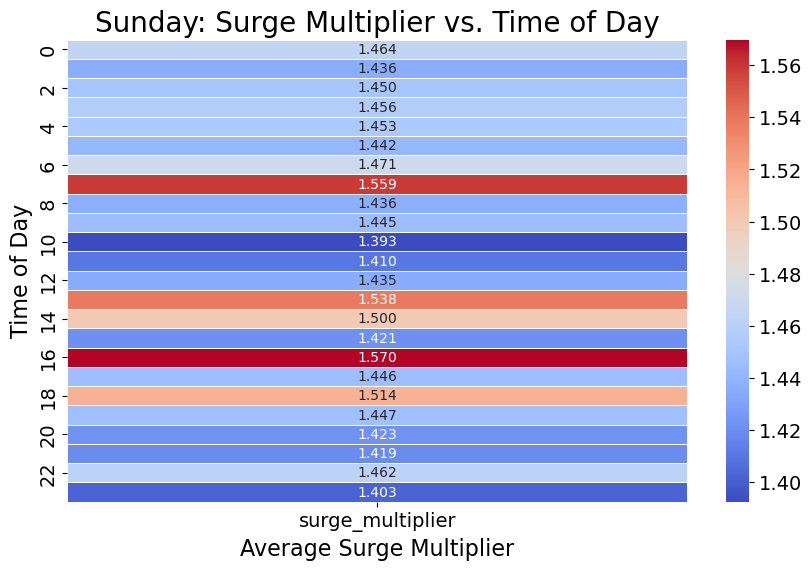

In [60]:
for i in range(0,7):
    lyft_day = lyft_surge[lyft_surge['day_of_week'] == i]
    pivot_table = lyft_day.pivot_table(index='hour', values='surge_multiplier', aggfunc='mean')
    #Create the heatmap
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.3f', linewidths=0.5)

    plt.ylabel('Time of Day')
    plt.xlabel('Average Surge Multiplier')
    if(i == 0):
        plt.title('Monday: Surge Multiplier vs. Time of Day')
    if(i == 1):
        plt.title('Tuesday: Surge Multiplier vs. Time of Day')
    if(i == 2):
        plt.title('Wednesday: Surge Multiplier vs. Time of Day')
    if(i == 3):
        plt.title('Thursday: Surge Multiplier vs. Time of Day')
    if(i == 4):
        plt.title('Friday: Surge Multiplier vs. Time of Day')
    if(i == 5):
        plt.title('Saturday: Surge Multiplier vs. Time of Day')
    if(i == 6):
        plt.title('Sunday: Surge Multiplier vs. Time of Day')
        
    plt.show()

### Weekdays saw common ride requests between 9am-4pm. Contrary to expectations, Friday showed surges at 8pm, 9pm, and 5pm, but Saturday did not follow the same trend. This difference might be due to more available drivers on weekends, as many drive part-time for Lyft.

<a id='Conclusion'></a>
## Our Exploration

In this project we examined the feature 'surge_multiplier' and various explanations for its behavior across our dataset. We looked at thousands of Lyft rides across the Boston area, choosing several features that we hypothesized as being most likely to have an impact on the surge_multiplier and using graphs and plots to determine whether or not these features did infact correlate or not.

Let's examine each feature we studied:

### Price:
[Price](#Price) was an obvious feature to look at first to familiarize ourselves with how the surge_multiplier affected the most important feature to consumers, price. Price wasn’t a feature that we thought would influence the surge_multiplier, but instead a feature that the surge_multiplier would influence. We noticed a positive correlation between the two variables, which made sense as higher surge_multipliers result in higher prices for a given ride, and we used a linear regression model to create a best fit line that demonstrated the relationship. From the conclusions we drew from this graph we began to wonder what other variables might show strong correlation with the surgeg_multiplier.

### Time of Day: 
We were curious about whether the surge_multiplier shifted around depending on the time of day. We created [an initial heat map](#aTOD) that showed the average surge_multiplier based on the hour. We saw some interesting findings with the highest surges happening between 9am to 4pm, hours when shops are open and people are moving about.

We wanted to explore this feature more in depth, so we created 7 more plots, showcasing the same data but broken down by each day of the week right [here](#sTOD). Again we saw that during the work week the most common hours were between 9am-4pm. We expected to see a surge in later Lyft rides on Friday and Saturday, but this was only half-true. On Friday there was a notable spike at 8pm and 9pm, and also at 5pm (happy hour?). Saturday did not follow this same pattern. We hypothesize that this may be because there are more available drivers on the weekend. Many Lyft drivers drive for Lyft on the side, and maybe be more available/willing to work weekend nights to make some extra cash.

Overall, we didn’t see anything that we could draw strong conclusions from. There are some interesting things to remark about these graphs, but they don’t reveal any strong correlations between certain hours of certain days having a higher surge_multiplier. Nonetheless, we are including these visualizations because we feel as though proving a lack of correlation with features that one may initially believe to be related, is also important!

### Source/Destination: 

We first graphed a [stacked bar plot](#iSource) that revealed to us that source is an important factor in surge multiplier but destination remained very equal per location. Thus, we looked into the sources at every discrete surge multiplier (including 1), creating a [bar plot](#Source) for each value. We found something very interesting: at a surge multiplier of 1, Back Bay was the source with the least amount of rides although not by much. The most rides came from North End (around 25,000) and Back Bay in last place still had around 22,500 rides. However, when the surge multiplier starts to increase, Back Bay shoots up and is one of the most frequent sources as surge multiplier increases. From 1.75 to 3.0 it is the most frequent source for surge multiplied rides. To us, this indicates a strong correlation between Back Bay and the surge multiplier. For some reason, there can be very high demand in Back Bay with not enough drivers to satisfy it. Back Bay is a large shopping and commercial district with many hotels, so it makes sense it could be a source in high demand.

### Car Type: 

We also wanted to explore [car type](#carType), as we thought regular Lyfts would be more in demand since they are usually the most frequently ordered cars. However, we were surprised to see that there was no strong correlation. A simple bar graph reveals the average surge multiplier per product type stays very similar. This is a lack of correlation that is still important to note as it is one that we might expect to see. Proving a lack of correlation is also important!

### Wind Gust/Wind Speed: 

[This line plot](#wind) was one of the more interesting features we observed which seemed to demonstrate a correlation with surge multiplier as it got quite large. The wind gust and speed increases when the surge multiplier reaches 3.0. This confirms part of our hypothesis that undesirable/more extreme weather is correlated to a high surge multiplier.


### Apparent Temperature: 

[Apparent temperature](#temp) reveals a similar correlation: as the temperature gets colder, surge multiplier increases, particularly at 3.0. We created a nice line plot to demonstrate this, confirming our hypothesis.

### Short Weather Summary: 

We created a [heat map](#sws) to reveal the correlation between each short summary and each surge multiplier. We found there seemed again to be a correlation with less desirable weather and a high surge multiplier.

### Rain: 

We were intrigued by our heatmap and decided to further investigate [rain statistics](#rain). Again, we confirmed that rain has a correlation with a high surge multiplier of 3.0. 

### Rides Before/After Sunset

This was an aspect of our hypothesis that we got wrong. We predicted that there would be more of a demand after sunset since many people would be quite desperate to get home when it gets dark. However, there doesn’t seem to be a correlation in this [bar plot](#sunset). Perhaps there are more drivers available at night. We feel as though this is an important visualization to keep in order to disprove part of our hypothesis.

### Day of Week: 

Similarly, we felt that the day of the week would have some correlation to the surge multiplier. Perhaps Fridays and Saturdays would have higher surges. However, the [violin plot](#violin) shows quite nicely how day of the week really does not have a strong relationship with surge_multiplier. This again, disproves parts of our hypothesis: it seems time of day and what day does not relate strongly to surge_multiplier. 

## Our Conclusion

Our hypothesis was partly correct. We found that weather statistics such as rain, wind, and short summaries are correlated to a high surge multiplier. Our analysis reveals that as weather becomes more intense/undesirable, the surge multiplier increases, likely because people are trying to catch a ride more desperately. In our hypothesis, we thought that day of the week, time of day, and night or day rides would be correlated to a surge multiplier. We thought Friday and Saturday at night would have a large surge multiplier since Boston is a big college town and young, professional city, and thus lots of people would be going out at night. Our heatmaps actually demonstrate this for Friday and Saturday, but so do other weekdays. Similarly, the ratio of surcharged to regularly priced rides did not change during the night and day. Thus, we conclude that time of day, day of the week, and sunset time are not correlated strongly with the surge multiplier. Instead, the aforementioned weather statistics are better correlated. Finally, the source of the ride was one of the strongest correlations to surge multiplier, which is a feature we overlooked in our hypothesis. Back Bay seems to be one of the most likely destinations to catch a surge-multiplied Lyft ride, particularly as the surge multiplier increases.

### Ethical Considerations

There are some ethical issues and shortcomings when using this data to form our conclusions. 

The direct stakeholders are Bostonians who rode with Lyft and Uber during this time period. But more generally, stakeholders also include anyone involved with ridesharing apps such as other users in locations, drivers, and even the company themselves. The conclusions drawn from our analysis can impact these stakeholders; for example, Lyft may notice that demand for a ride goes up in more intense weather and thus they may choose to modify their pricing algorithm to increase the surge_multiplier to a number even greater than 3.0. Or perhaps a driver notices that surge_multiplied rides stay relatively similar during night and during day, and thus they may choose to favor working during the day. All of these could negatively and positively impact stakeholders at the same time. If Lyft makes a more aggressive surge multiplier based on this analysis, they would benefit while users suffer. Thus, it is important to approach data science from the perspective of transparency to ensure all stakeholders' interests are carefully considered.

As described above, the conclusions drawn from this analysis could greatly impact people other than myself. Lyft may decide to further increase the surge multiplier when there is more intense weather which would negatively impact users, but likely benefit the company and drivers. We must be careful about whose interests we are serving when drawing conclusions such as these.

Further ethical considerations revolve around data privacy. It is unclear exactly how this dataset was put together, but it is unlikely that the gatherer gained the consent of every driver and rider to include their rides. This dataset could potentially reveal sensitive information about where someone lives, works, or spends their time. Thus, it is important that this dataset is anonymized effectively in order to hide sensitive details about users and potentially drivers.

Another ethical concern could be the inclusion of inevitable bias in our analysis and conclusion. Calling Lyft/Uber rides may have strong socioeconomic, geographic, and demographic implications and such analysis may inadvertently reinforce these biases.

To resolve these issues we can take a number of certain steps. Firstly, providing anyone interested with this full Jupyter Notebook is important, as it clearly lays out the steps and analysis we performed to arrive at our conclusion. This is important for transparency in data science. We want all stakeholders, users, regulators, and companies to be able to follow our work in order to verify the validity of our work.

Secondly, a dataset should be anonymized and stripped of any features that may reveal personal information. It seems as though this has already been done for this dataset, but it is crucial to stress this step for all datasets. Also, data should be analyzed in a way that prevents the discovery of individuals.

Another critical alternative could be to collect the consent of riders and drivers before collecting this data. Perhaps Lyft or Uber could add a pop-up feature on the app asking for consent from both participants before riding. This step may be a bit impractical, however, as we imagine people may consent without fully knowing what their data would be used for. Regardless, the most important part of anonymization and consent is protecting people’s privacy and safety.

Further, we could take steps to investigate bias and mitigate it in our analysis. It would also be important to document where we found bias and how we addressed it.

Lastly, we think a third-party reviewer could come and test our conclusions and analysis, ensuring that we accurately came to a valid conclusion. While this is not plausible for a project of this scale, for larger, more impactful projects, a second opinion on the validity of this work could help others trust our conclusion.

## Analysis of Data Quality

The most informative features were price, precipitation features, apparent temperature, short summary, wind features, and source. These showed a positive correlation to surge_multiplier. Other features like destination, day_of_week, and product_id did not show this correlation, but we still argue that they are important features to understand the surge multiplier. We gain valuable information by recognizing these features do not show a correlation to surge multipliers because one may initially believe them to be somehow related to the surge. Thus, we think showing a lack of a relationship between potentially likely features and surge multiplier also reveals valuable information. 

Oppositely, there were some features that were not relevant and one would not expect to be relevant. Features such as moonphase, pressure, and wind bearing which were not likely to be informative were (predictably) not informative. 

Some data that was missing were Ubers with a surge multiplier. Somehow every Uber ride in this dataset has a surge_multiplier =1. We feel this may have been an intentional choice by the curator of this data, as it is unlikely that over 300,000 Uber rides were never surge multiplied. It would have been interesting to explore how features correlate to Uber’s and Lyft’s surge multipliers differently. On top of that, we would have liked to see more data for surge multiplied rides. Out of roughly 300,000 Lyft rides, only about 20,000 rides were surge multiplied and many of them were represented by lower surge multipliers like 1.25 or 1.5. We would have liked more data points with surge multiplied rides, particularly when the surge multiplier is greater than or equal to 2. I think with more data like this, we would have seen even stronger correlations. Some data that could have been very useful to have would have been data about traffic in the area when the ride was called. This is a feature we expect would certainly influence the surge multiplier. It would also be interesting to see the type of location people are ordering rides to/from ie: home, work, restaurant, bar, etc. This way we could see when there is a higher surge multiplier, where do people seem to be leaving/going to.
